# 1. Loading Data

In [ ]:
library(caret)

In [1]:
data <- read.csv("../data/blobs/uPab.0", header = FALSE, sep = ";")
names(data) <- c("p","nmc","nblob","nsa","ncore","ncmt","na","blob","ncopy")
data$copied <- data$ncopy > 0

In [145]:
summary(data)

                                    p                  nmc        
 TheMattSykes_personal-website       :  4022099   Min.   :  0.00  
 AlexxNica_doc.servo.org             :  3802719   1st Qu.:  2.00  
 AdrianDC_aosp_development_sony8960_q:  3113923   Median :  8.00  
 CISecurity_OVALRepo                 :  2638118   Mean   : 36.38  
 odoo_odoo                           :  2181203   3rd Qu.: 38.00  
 3442853561_pistondoc                :  1874252   Max.   :375.00  
 (Other)                             :282784051                   
     nblob              nsa               ncore              ncmt        
 Min.   :      1   Min.   :     0.0   Min.   :   1      Min.   :      1  
 1st Qu.:   1333   1st Qu.:     0.0   1st Qu.:   1      1st Qu.:     25  
 Median :   9906   Median :     0.0   Median :   2      Median :    161  
 Mean   : 313067   Mean   :   744.9   Mean   : 113      Mean   : 152056  
 3rd Qu.:  88700   3rd Qu.:    10.0   3rd Qu.:   3      3rd Qu.:   1892  
 Max.   :5508791   M

In [4]:
data$lnmc <- log(data$nmc + 1)
data$lnblob <- log(data$nblob + 1)
data$lnsa <- log(data$nsa + 1)
data$lncore <- log(data$ncore + 1)
data$lncmt <- log(data$ncmt + 1)
data$lna <- log(data$na + 1)
data$lncopy <- log(data$ncopy + 1)
nas <- which(is.na(data$ncore) | is.na(data$na))
data_c <- data[-nas,c("p","lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy")]

In [49]:
summary(data_c)

                                    p                  lnmc      
 TheMattSykes_personal-website       :  4022099   Min.   :0.000  
 AdrianDC_aosp_development_sony8960_q:  3113923   1st Qu.:1.099  
 CISecurity_OVALRepo                 :  2638118   Median :2.197  
 odoo_odoo                           :  2181203   Mean   :2.511  
 3442853561_pistondoc                :  1874252   3rd Qu.:3.689  
 funtoo_experimental-mini-2011       :  1823296   Max.   :5.930  
 (Other)                             :279434035                  
     lnblob             lnsa            lncore           lncmt        
 Min.   : 0.6931   Min.   : 0.000   Min.   :0.6931   Min.   : 0.6931  
 1st Qu.: 7.1647   1st Qu.: 0.000   1st Qu.:0.6931   1st Qu.: 3.2581  
 Median : 9.1447   Median : 0.000   Median :1.0986   Median : 5.0499  
 Mean   : 9.2784   Mean   : 1.759   Mean   :1.4404   Mean   : 5.6372  
 3rd Qu.:11.2881   3rd Qu.: 2.485   3rd Qu.:1.3863   3rd Qu.: 7.6094  
 Max.   :15.5219   Max.   :11.616   Max.   :8.

Test data

In [ ]:
data_t <- read.csv("../data/blobs/uPab_test.0", header = FALSE, sep = ";")
names(data_t) <- c("p","nmc","nblob","nsa","ncore","ncmt","na","blob","ncopy")
data_t$copied <- data_t$ncopy > 0
data_t$lnmc <- log(data_t$nmc + 1)
data_t$lnblob <- log(data_t$nblob + 1)
data_t$lnsa <- log(data_t$nsa + 1)
data_t$lncore <- log(data_t$ncore + 1)
data_t$lncmt <- log(data_t$ncmt + 1)
data_t$lna <- log(data_t$na + 1)
data_t$lncopy <- log(data_t$ncopy + 1)
nas_t <- which(is.na(data_t$ncore) | is.na(data_t$na))
data_tc <- data_t[-nas_t,c("p","lnmc","lnblob","lnsa","lncore","lncmt","lna","copied","lncopy")]

# 2. Correlations

In [7]:
pred_n <- c(2:7)

In [56]:
cor(data_c[,pred_n],method="spearman")

,lnmc,lnblob,lnsa,lncore,lncmt,lna
lnmc,1.0000000,0.5242928,0.7121010,0.5699704,0.8897361,0.7450550
lnblob,0.5242928,1.0000000,0.4394352,0.3683275,0.5402930,0.4450408
lnsa,0.7121010,0.4394352,1.0000000,0.5484231,0.6781614,0.6865592
lncore,0.5699704,0.3683275,0.5484231,1.0000000,0.6284436,0.8450870
lncmt,0.8897361,0.5402930,0.6781614,0.6284436,1.0000000,0.7899323
lna,0.7450550,0.4450408,0.6865592,0.8450870,0.7899323,1.0000000


Standard deviations (1, .., p=6):
[1] 2.1458975 0.7925032 0.6408342 0.4900691 0.2929314 0.1744061

Rotation (n x k) = (6 x 6):
             PC1         PC2         PC3         PC4         PC5          PC6
lnmc   0.4127365  0.12655864 -0.64349742  0.10430538 -0.61579558  0.097255970
lnblob 0.3212261  0.85458026  0.39366714 -0.09971444 -0.03878803 -0.009225134
lnsa   0.4149031 -0.22057111 -0.05313086 -0.84656158  0.17225844  0.173324694
lncore 0.4077342 -0.36264552  0.52767243  0.32422920 -0.21532189  0.521837871
lncmt  0.4346419  0.06837165 -0.33055836  0.38642817  0.73274402  0.104414338
lna    0.4462701 -0.26236888  0.20101577  0.08977528 -0.07963040 -0.822920170


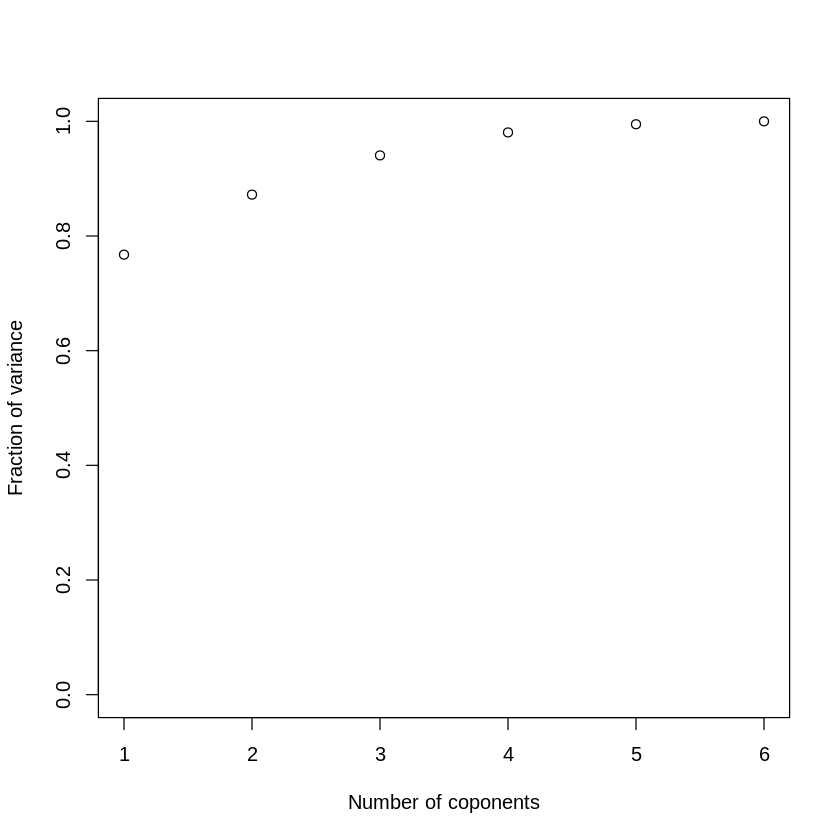

In [99]:
pca <- prcomp(data_c[,pred_n], retx=F, scale=T)
print(pca)
var <- sum(pca$sdev^2)
cumVar <- cumsum(pca$sdev^2)
plot(1:6,cumVar/var,ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance")

In [100]:
n <- 0
varPer <- 0.9
for (i in c(1:length(pca$sdev))) {
    if(cumVar[i] > var*varPer) {
        n <- i
        break
    }
}
res <- pca$rotation[,1:n]
resAbs <- res
resAbs[res<0] <- -res[res<0]
for (i in 1:n)
  print(t(res[resAbs[,i]>.3,i,drop=FALSE]));

         lnmc    lnblob      lnsa    lncore     lncmt       lna
PC1 0.4127365 0.3212261 0.4149031 0.4077342 0.4346419 0.4462701
       lnblob     lncore
PC2 0.8545803 -0.3626455
          lnmc    lnblob    lncore      lncmt
PC3 -0.6434974 0.3936671 0.5276724 -0.3305584


In [8]:
vnam <- names(data_c[,pred_n])
len <- dim(data_c[,pred_n])[2]
res <- vector(mode="list", length=len)
for (i in 1:len){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-i],collapse="+"),sep="~"));
  res[[i]] <- lm(fmla,data=data_c[,pred_n]);
}

In [9]:
for (i in 1:len) {
    print(c(vnam[i],"-> ",summary(res[[i]])$adj.r.squared),quote=FALSE)
}

[1] lnmc              ->                0.828950609106906
[1] lnblob            ->                0.384352131731084
[1] lnsa              ->                0.774733504572413
[1] lncore            ->                0.907868966300289
[1] lncmt             ->                0.867581629389782
[1] lna               ->                0.955795503217049


# 3. Model

### 3.1. ~ lnmc + lnblob + lnsa + lncmt

In [117]:
lm <- lm(lncopy~lnmc+lnblob+lnsa+lncmt, data=data_c)
summary(lm)


Call:
lm(formula = lncopy ~ lnmc + lnblob + lnsa + lncmt, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4148 -0.1434 -0.1011 -0.0655 14.4563 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.586e-02  1.030e-04   833.9   <2e-16 ***
lnmc        -7.210e-03  4.265e-05  -169.0   <2e-16 ***
lnblob       8.178e-03  1.256e-05   651.0   <2e-16 ***
lnsa         3.471e-02  1.658e-05  2093.5   <2e-16 ***
lncmt       -1.383e-02  2.021e-05  -684.5   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4775 on 295086921 degrees of freedom
Multiple R-squared:  0.02114,	Adjusted R-squared:  0.02114 
F-statistic: 1.593e+06 on 4 and 295086921 DF,  p-value: < 2.2e-16


In [ ]:
plot(residuals(lm, type="deviance"))

In [36]:
glm <- glm(copied~lnmc+lnblob+lnsa+lncmt,data=data_c,family=binomial)
summary(glm)


Call:
glm(formula = copied ~ lnmc + lnblob + lnsa + lncmt, family = binomial, 
    data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8897  -0.4952  -0.4290  -0.3752   2.8120  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -2.414e+00  7.324e-04 -3296.24   <2e-16 ***
lnmc         1.625e-02  3.091e-04    52.58   <2e-16 ***
lnblob       7.085e-02  8.679e-05   816.40   <2e-16 ***
lnsa         2.000e-01  1.112e-04  1797.68   <2e-16 ***
lncmt       -1.524e-01  1.449e-04 -1052.17   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 196275349  on 295086925  degrees of freedom
Residual deviance: 191665246  on 295086921  degrees of freedom
AIC: 191665256

Number of Fisher Scoring iterations: 5


In [37]:
glm_p <- predict(glm,newdata=data_tc,type="response") > 0.5
confusionMatrix(data=factor(glm_p), reference = factor(data_tc[,"copied"]))

Warning message in confusionMatrix.default(data = factor(glm_p), reference = factor(data_tc[, :
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction    FALSE     TRUE
     FALSE 18224593  1625415
     TRUE         0        0
                                         
               Accuracy : 0.9181         
                 95% CI : (0.918, 0.9182)
    No Information Rate : 0.9181         
    P-Value [Acc > NIR] : 0.5002         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.9181         
         Neg Pred Value :    NaN         
             Prevalence : 0.9181         
         Detection Rate : 0.9181         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : FALSE          
                    

### 3.2. ~ lnsa

In [8]:
lm2 <- lm(lncopy~lnsa, data=data_c)
summary(lm2)


Call:
lm(formula = lncopy ~ lnsa, data = data_c)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3557 -0.1310 -0.0858 -0.0858 14.4448 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.584e-02  3.331e-05    2577   <2e-16 ***
lnsa        2.324e-02  1.038e-05    2238   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4786 on 295086924 degrees of freedom
Multiple R-squared:  0.01669,	Adjusted R-squared:  0.01669 
F-statistic: 5.008e+06 on 1 and 295086924 DF,  p-value: < 2.2e-16


In [9]:
glm2 <- glm(copied~lnsa,data=data_c,family=binomial)
summary(glm2)


Call:
glm(formula = copied ~ lnsa, family = binomial, data = data_c)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7272  -0.4646  -0.4231  -0.4231   2.2172  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.368e+00  2.426e-04   -9764   <2e-16 ***
lnsa         1.010e-01  6.192e-05    1631   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 196275349  on 295086925  degrees of freedom
Residual deviance: 193818462  on 295086924  degrees of freedom
AIC: 193818466

Number of Fisher Scoring iterations: 5


In [34]:
glm2_p <- predict(glm2,newdata=data_tc,type="response") > 0.5
confusionMatrix(data=factor(glm2_p), reference = factor(data_tc[,"copied"]))

Warning message in confusionMatrix.default(data = factor(glm2_p), reference = factor(data_tc[, :
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction    FALSE     TRUE
     FALSE 18224593  1625415
     TRUE         0        0
                                         
               Accuracy : 0.9181         
                 95% CI : (0.918, 0.9182)
    No Information Rate : 0.9181         
    P-Value [Acc > NIR] : 0.5002         
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.0000         
         Pos Pred Value : 0.9181         
         Neg Pred Value :    NaN         
             Prevalence : 0.9181         
         Detection Rate : 0.9181         
   Detection Prevalence : 1.0000         
      Balanced Accuracy : 0.5000         
                                         
       'Positive' Class : FALSE          
                    